In [1]:
# Standard Imports
import numpy as np
from time import time
from matplotlib import pyplot as plt

from rikabplotlib.plot_utils import  newplot, plot_event, hist_with_outline



from pyspecter.SPECTER import SPECTER




1.0
(1, 225, 3)
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.    

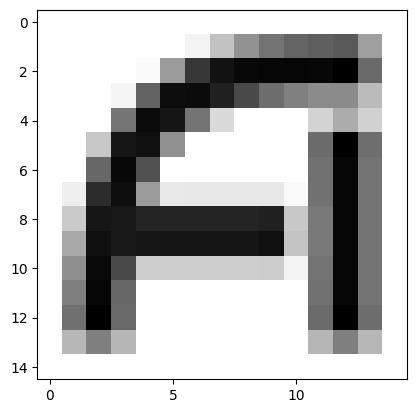

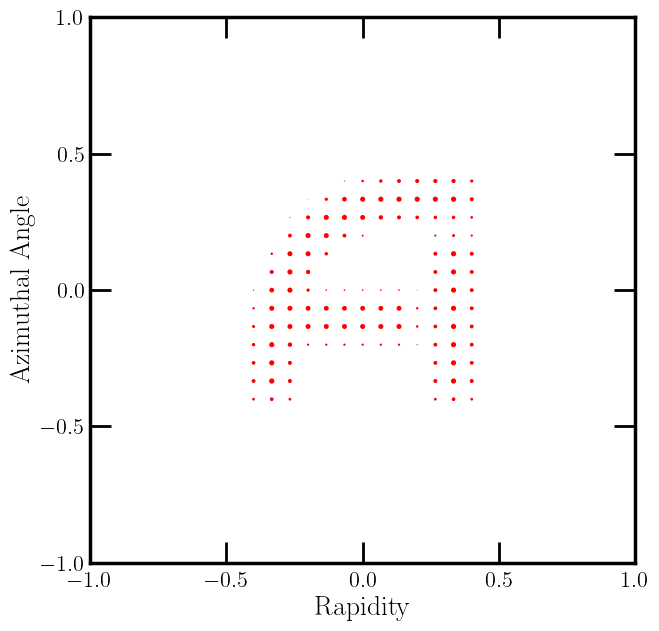

<Axes: xlabel='Rapidity', ylabel='Azimuthal Angle'>

In [2]:
from PIL import Image

# Parameters
R = 1.0
N = 50
pt_lower = 475
pt_upper = 525
eta = 1.9
quality = 2
pad = 125
plot_dir = "results"

image_1_loc = "iaifi-logo-black-noborder-hires.jpg"
image_2_loc = "iaifi-logo-black-noborder-hires.jpg"


def convert_image_to_array(image_path, N = 100):
    # Load the image
    with Image.open(image_path) as img:
        # Calculate the aspect ratio
        original_width, original_height = img.size
        aspect_ratio = original_width / original_height

        # Calculate new dimensions for downsampling
        # The target is to have at most 625 pixels
        max_pixels = 250
        new_height = int((max_pixels / aspect_ratio) ** 0.5)
        new_width = int(aspect_ratio * new_height)

        # Resize the image
        resized_img = img.resize((new_width, new_height))

        # Convert image to greyscale
        grey_img = resized_img.convert('L')

        # display the image
        plt.imshow(grey_img, cmap='gray')

        # Initialize array
        pixel_array = []

        # Iterate over each pixel in the resized image
        for y in range(new_height):
            for x in range(new_width):
                # Get pixel value (0 to 255)
                pixel_value = grey_img.getpixel((x, y))

                # Normalize intensity (1 for black, 0 for white)
                intensity = 1 - (pixel_value / 255)

                # Normalize x and y coordinates
                norm_x = x / new_width
                norm_y = y / new_height

                # Append to array
                pixel_array.append([intensity, norm_x, norm_y])

        # Sort the list by intensity
        pixel_array = sorted(pixel_array, key=lambda x: x[0], reverse=True)

        # Keep only the top N pixels
        # pixel_array = pixel_array[:N]

        # Normalize intensities to sum to 1
        pixel_array = np.array(pixel_array)
        pixel_array[:,0] = pixel_array[:,0] / np.sum(pixel_array[:,0])

        # Center by subtracting mean x and y
        pixel_array[:,1] = pixel_array[:,1] - np.mean(pixel_array[:,1])
        pixel_array[:,2] = pixel_array[:,2] - np.mean(pixel_array[:,2])

        # flip y
        pixel_array[:,2] = -pixel_array[:,2]

        return pixel_array

image1 = convert_image_to_array(image_1_loc, N = 150)
image2 = convert_image_to_array(image_2_loc)

print(image1[:,0].sum())

# Remove all pixels with intensity 0
# image1 = image1[image1[:,0] > 0.002]

# Add extra dimension for batch in the front
image1 = np.expand_dims(image1, axis=0)
image2 = np.expand_dims(image2, axis=0)

# print(image1)
print(image1.shape)

print(np.sort(image1[0,:,0]))


fig, ax = newplot("full")

plot_event(ax, image1[0], R, color = "red")
# plot_event(image2[0,:,1:], image2[0,:,0], R, color = "blue")


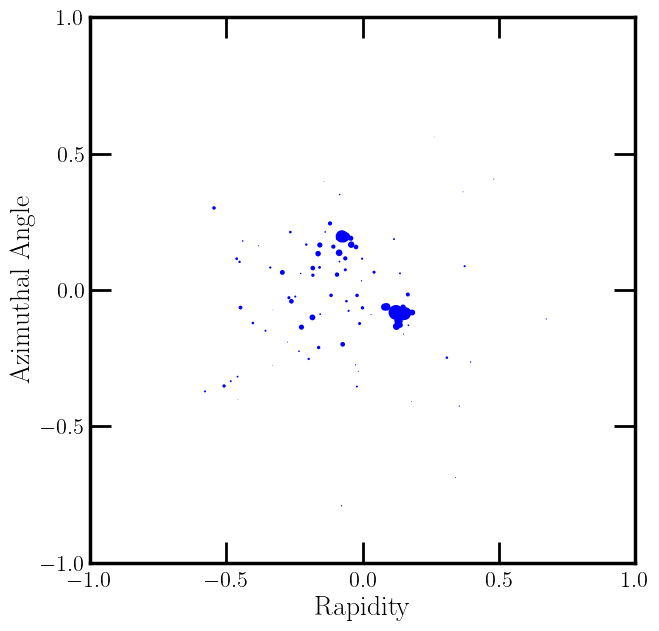

<Axes: xlabel='Rapidity', ylabel='Azimuthal Angle'>

In [3]:
def load_qcd(N = 100):
    d = np.load("/n/holyscratch01/iaifi_lab/rikab/top_qcd/top_qcd_0.npz")
    X = np.array(d["data"])
    Y = d["labels"]

    qcd = X[Y == 0]
    qcd = qcd[:N, :125, :3]

    return qcd

qcd = load_qcd(N = 10000)

for x in qcd:

        energies = x[:,0]
        etas = x[:,1]
        phis = x[:, 2]

        # translate such that the phi of the hardest particle is 0
        max_phi_index = np.argmax(energies)
        phis = phis - phis[max_phi_index]


        # # # Wrap the phis to be between -pi and pi
        phis = (phis ) % (2 * np.pi)
        phis_above_pi = phis > np.pi
        phis[phis_above_pi] = phis[phis_above_pi] - 2 * np.pi
        phis_below_minus_pi = phis < - np.pi
        phis[phis_below_minus_pi] = phis[phis_below_minus_pi] + 2 * np.pi
        # # phis = (phis ) % (2 * np.pi)

        x[:,0] = energies / np.sum(energies)
        x[:,1] = etas - np.average(etas, weights=energies)
        x[:,2] = phis - np.average(phis, weights=energies)


        # # # Wrap the phis to be between -pi and pi
        for i in range(10):

            phis = x[:,2]
            phis = (phis ) % (2 * np.pi)
            phis_above_pi = phis > np.pi
            phis[phis_above_pi] = phis[phis_above_pi] - 2 * np.pi
            phis_below_minus_pi = phis < - np.pi
            phis[phis_below_minus_pi] = phis[phis_below_minus_pi] + 2 * np.pi
            x[:,2] = phis - np.average(phis, weights=energies)


fig, ax = newplot("full")
plot_event(ax, x, R, color = "blue")

In [4]:
specter = SPECTER(compile = True)

Compiling SPECTER model...
Generating test events for tracing ...
Test events generated! Time taken:  4.443082571029663  seconds.
Compiling spectral representation functions ...
Compiling observables...
Observables compiled! Time taken:  34.741153955459595  seconds.
Compilation complete! Time taken:  34.74118256568909  seconds.


In [5]:
# Compute the SEMD
from tqdm import tqdm

SEMDs = []
for event in tqdm(qcd):

    bee = np.expand_dims(event, axis=0)

    specter_emds = specter.spectralEMD(bee, image1)
    SEMDs.append(specter_emds[0]) 

  0%|          | 0/10000 [00:00<?, ?it/s]

100%|██████████| 10000/10000 [06:33<00:00, 25.41it/s]


[[ 7.93713320e-04 -7.73018599e-02 -7.90814877e-01]
 [ 4.58193390e-04  3.40837121e-01 -6.87614918e-01]
 [ 2.17344612e-03 -5.77920735e-01 -3.71304989e-01]
 [ 6.95799885e-04  6.73274159e-01 -1.05874538e-01]
 [ 4.98961854e-05 -4.11889851e-01 -4.74264622e-01]
 [ 6.46545319e-03 -5.45017481e-01  3.01285625e-01]
 [ 5.71432244e-03 -5.08046865e-01 -3.51414204e-01]
 [ 1.68194980e-04  2.64522135e-01  5.61455607e-01]
 [ 2.27502111e-04 -4.57611859e-01 -4.02124882e-01]
 [ 2.00670306e-03 -4.83586848e-01 -3.34034443e-01]
 [ 1.79317570e-03 -4.58799839e-01 -3.17285061e-01]
 [ 4.86235629e-04  4.80994105e-01  4.07165408e-01]
 [ 7.37355673e-04  3.54330122e-01 -4.25224781e-01]
 [ 2.35711210e-04 -1.41214848e-01  3.98435473e-01]
 [ 3.96624254e-03 -4.61902857e-01  1.15155585e-01]
 [ 1.25491561e-03 -4.39791858e-01  1.80185691e-01]
 [ 2.97270878e-03 -4.51383859e-01  1.03685267e-01]
 [ 7.32415449e-03 -4.47826862e-01 -6.40444756e-02]
 [ 9.20321560e-04  3.95734191e-01 -2.63784885e-01]
 [ 3.49308597e-03 -4.02676880e-

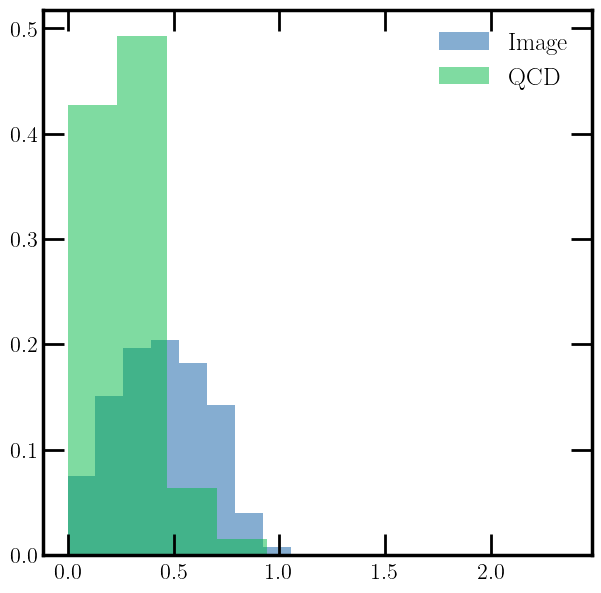

In [6]:
from pyspecter.SpectralEMD_Helper import compute_spectral_representation

s1 = compute_spectral_representation(image1[0])
s2 = compute_spectral_representation(event)

print(event)

print(s1)
print(s2)

fig, ax = newplot("full")
ax.hist(s1[:,0], weights = s1[:,1], label = "Image", alpha = 0.5)
ax.hist(s2[:,0], weights = s2[:,1], label = "QCD", alpha = 0.5)
ax.legend()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[Array(0.07048422, dtype=float32), Array(0.05680913, dtype=float32), Array(0.12502477, dtype=float32), Array(0.19543585, dtype=float32), Array(0.04178095, dtype=float32), Array(0.17135435, dtype=float32), Array(0.18826775, dtype=float32), Array(0.03512952, dtype=float32), Array(0.00875673, dtype=float32), Array(0.19820511, dtype=float32), Array(0.11143371, dtype=float32), Array(0.15168446, dtype=float32), Array(0.05314159, dtype=float32), Array(0.12637606, dtype=float32), Array(0.16418168, dtype=float32), Array(0.09737536, dtype=float32), Array(0.06104, dtype=float32), Array(0.14787284, dtype=float32), Array(0.1497455, dtype=float32), Array(0.22016127, dtype=float32), Array(0.17470966, dtype=float32), Array(0.19671412, dtype=float32), Array(0.20976928, dtype=float32), Array(0.16534612, dtype=float32), Array(0.19516456, dtype=float32), Array(0.2042847, dtype=float32), Array(0.21608673, dtype=float32), Array(0.11762366, dtype=float32), Array(0.0778752, dtype=float32), Array(0.19929996, d

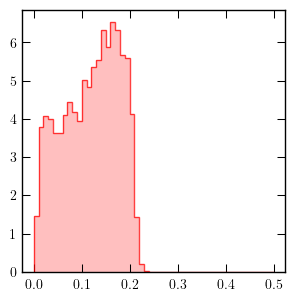

In [8]:
fig, ax = newplot("column")
print(SEMDs)

# plt.hist(SEMDs, bins = 50, color = "blue", label = "QCD")

hist_with_outline(ax, SEMDs , bins = 50, range = [0,0.5], color = "red", density = True)

plt.legend(loc = "upper right")
# plt.xlabel("SEMD")
# plt.ylabel("Density")